# Image segmentation demonstration
                                                by Alexandre Lefebvre and Guillaume Ghienne

## Watershed algorithm

We implemented from scratch a watershed algorithm and some processing image functions that could be usefull. You can find all our code on github: https://github.com/gghienne/image_segmentation.

We here will do a small demonstration to show how to perform watershed using our implementation.

### Import and configuration

We start by doing usefull import and configure the notebook.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from loader import load_images
from watershed import Watershed

load_images is simply here to load (and show) our data set, Watershed is the main class of our code with which we will perform segmentation on a small image test set.

### Presentation of our test set

We will use three images of different sizes and different difficulties to segment. From each image, we compute two new images: the groundtruth of the desired segmentation and a seed image on which we indicates roughly the foregound we desire.

#### Baby image

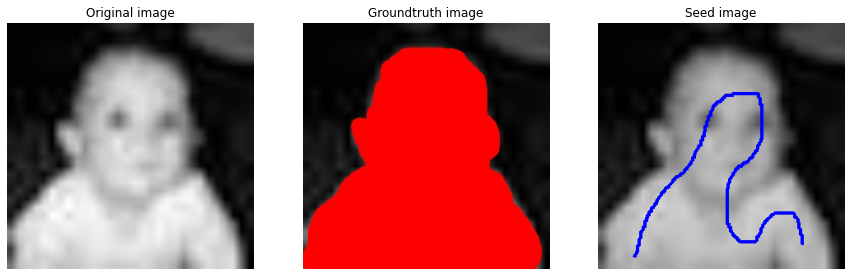

In [2]:
baby_original,baby_seed, baby_groundtruth = load_images("baby",show=True)

In [3]:
print("Size of the image:",baby_original.shape)

Size of the image: (300, 300)


#### Soccer image

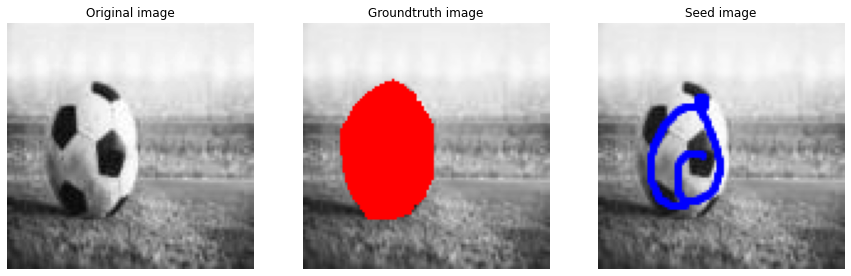

In [4]:
soccer_original,soccer_seed, soccer_groundtruth = load_images("soccer",show=True)

In [5]:
print("Size of the image:",soccer_original.shape)

Size of the image: (100, 100)


#### Horse image

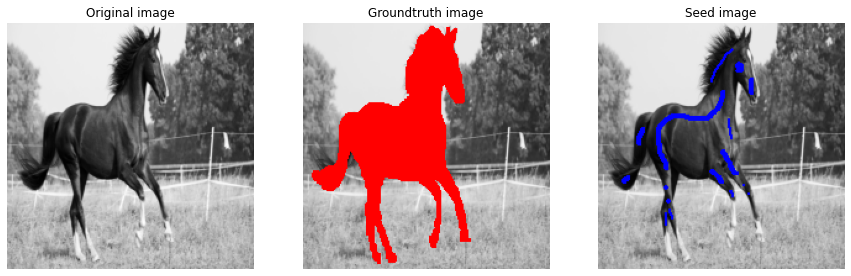

In [6]:
horse_original,horse_seed, horse_groundtruth = load_images("horse",show=True)

In [7]:
print("Size of the image:",horse_original.shape)

Size of the image: (200, 200)


Evenso the baby image is bigger, it looks simpler to segment than the two other. We will see that that the soccer and horse images can cause some issues when we want to segment them.

### Example of segmentation

Let see how we can segmentate the baby image using watershed algorithm.

We start by instanciate a class associated to the original image:

In [8]:
baby_watershed = Watershed(baby_original)

Now we run a simple segmentation of the image using the watershed algorithm.

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 176.49it/s]


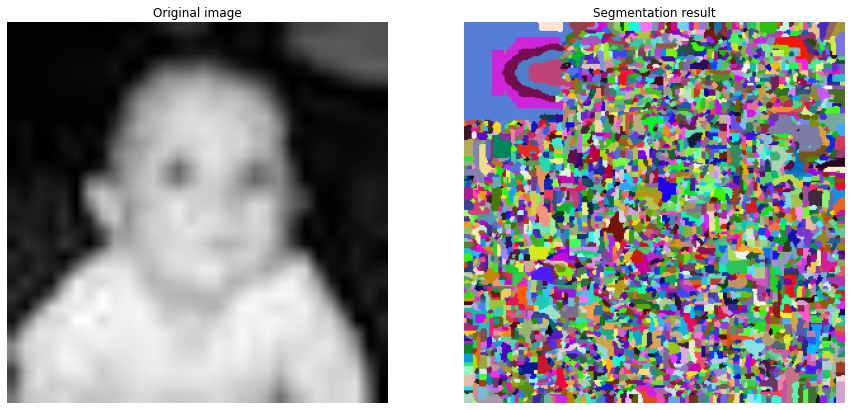

In [9]:
baby_watershed.segmentation()
baby_watershed.plot_result()

We see that many segments are resulting from the segmentation which is not usable like this. To solve that, we introduce a threshold that will remove non-significant minimum due to noise. Let see the influence of this parameter.

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 230.47it/s]


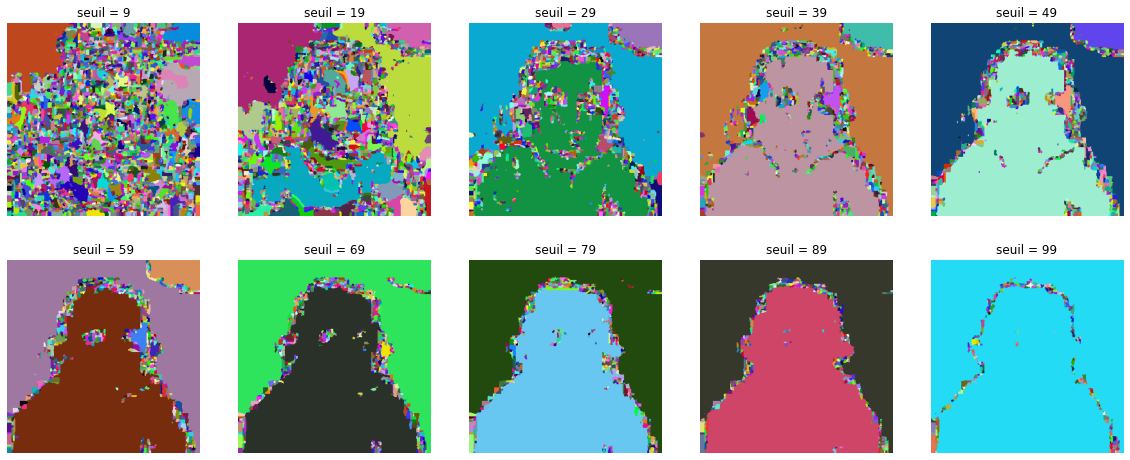

In [10]:
plt.figure(figsize=(20,8))
for i in range(10):
    baby_watershed.segmentation(seuil=i*10+9)
    plt.subplot(2,5,i+1),plt.axis("off"),plt.title("seuil = "+str(i*10+9))
    plt.imshow(baby_watershed.get_result())
plt.show()

As we can see, the number of segments reduces significantly when increasing the threshold. However, from a certain point, some points of the foreground will be in the same segment than some backgound points. That's our limit (seuil = 89 here).

We now group the labels we want to be in the foreground (simply using the seed image).

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 224.19it/s]


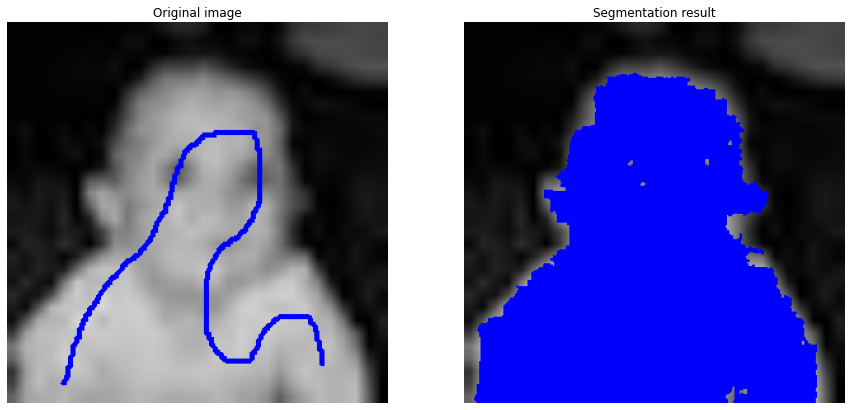

In [11]:
baby_watershed.segmentation(seuil=89)
baby_watershed.find_fg(baby_seed)
baby_watershed.plot_result(compare = baby_seed)

We can see that the segmentation is not perfect, there is some imperfection on the contour due to the high number of segments in this zone. Just to obtain a cleaner result we erode the contour using square whose size is controlled by the expand_rate parameter.

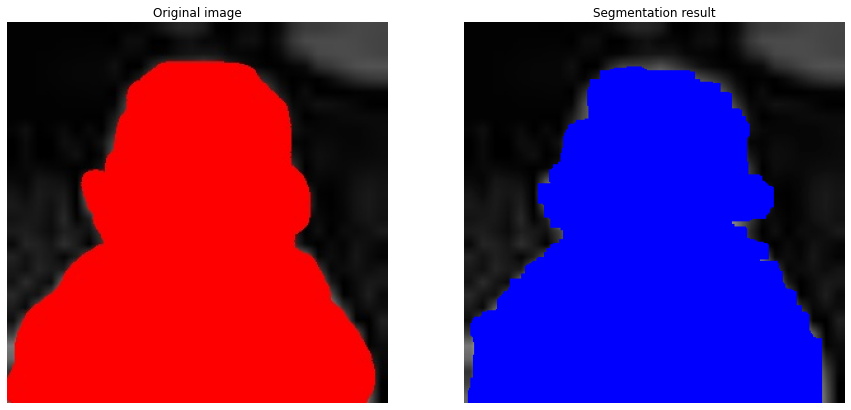

In [12]:
baby_watershed.find_fg(baby_seed,expand_rate = 3)
baby_watershed.plot_result(compare = baby_groundtruth)

We can now compute the Dice metric as well as the computational time of the segmentation.

In [13]:
baby_watershed.get_performances(truth = baby_groundtruth)

Runtime:  1.34 s
Dice   :  97.28 %


(1.3411657810211182, 97.28234400264947)

Let do the same thing with our two other image test.

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 560.51it/s]


Runtime:  0.19 s
Dice   :  91.38 %


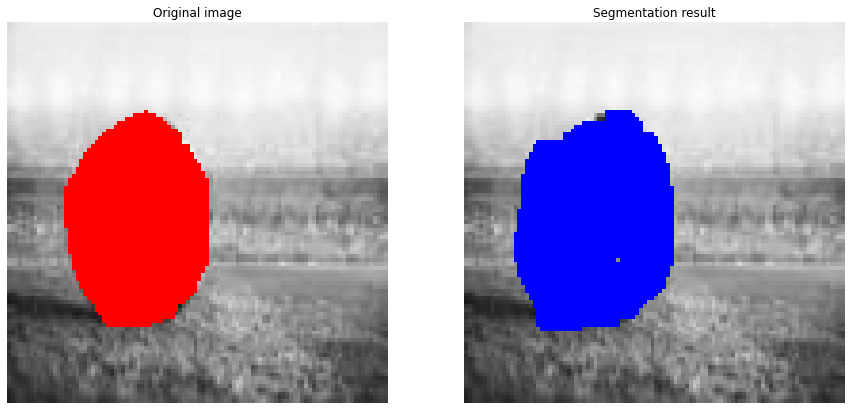

In [14]:
soccer_watershed = Watershed(soccer_original)
soccer_watershed.segmentation(seuil = 15)
soccer_watershed.find_fg(soccer_seed,expand_rate = 5)
soccer_watershed.get_performances(truth = soccer_groundtruth)
soccer_watershed.plot_result(compare = soccer_groundtruth)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 296.73it/s]


Runtime:  0.68 s
Dice   :  88.85 %


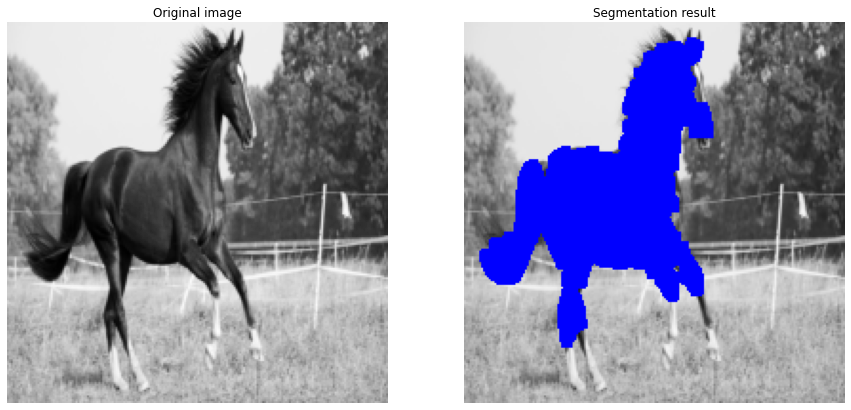

In [15]:
horse_watershed = Watershed(horse_original)
horse_watershed.segmentation(seuil = 23)
horse_watershed.find_fg(horse_seed,expand_rate = 2)
horse_watershed.get_performances(truth = horse_groundtruth)
horse_watershed.plot_result()#compare = horse_groundtruth)

### Computational time

The implementation of our algorithm is linear with the number of pixels. We can quickly check that:

100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 341.41it/s]


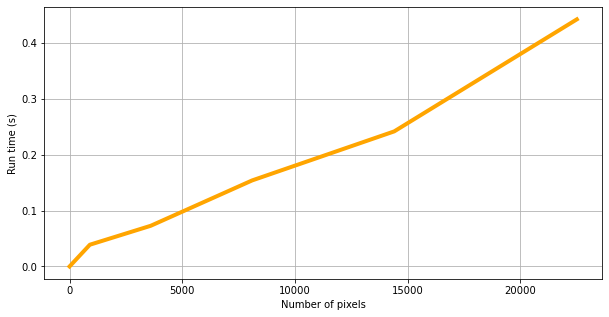

In [16]:
sizes, times =[0],[0]
for i in range(5):
    w = Watershed(baby_original[:30*(i+1),:30*(i+1)])
    w.segmentation()
    sizes.append((30*(i+1))**2)
    times.append(w.time)

plt.figure(figsize=(10,5))
plt.plot(sizes,times,linewidth=4,color='orange'),plt.grid("on")
plt.xlabel("Number of pixels")
plt.ylabel("Run time (s)")
plt.show()    